## Kvanttilaskenta 2022 laskuharjoitukset kierros 3

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$



Kierroksen kolme tehtävissä eräänä tavoitteena on tutkia miten erilaisten kvanttiporttien operaatiot vaikuttavat kubitin kvanttitilaa esittävään tilavektoriin Blochin pallolla. Sen takia on tärkeää tutkia tehtävien ratkaisuja myös <a href="https://bloch.ollpu.fi/" target="_blank">Blochin palloa kuvaavan simulaation avulla.</a>. 

## Johdanto tehtävävään 1, eli painotetun kolikon heitto ja z-akselin ympäri tapahtuva kierto

Tarkastellaan yhden kubitin kvanttipiiriä, jonka avulla halutaan toteuttaa kruuna (kubitin tila |1>) klaava ( kubitin tila |0>) kolikonheitto siten, että lopputuloksen |1> todennäköisyys on $\frac{2}{3}$ ja tilan |0> todennäköisyys $\frac{1}{3}$. Olkoon kubitin alkutila $1\cdot|0>+ 0\cdot|1>$.

Kubitin tilan mittaustulosta eli arvojen |0>  tai  |1> esiintymistodennäköisyyksiä voidaan muuttaa ja säätää halutuksi $R_y$-kvanttiportilla, joka vastaa kubitin kiertoa Blochin pallolla y-akselin ympäri. Kun alkutilassa |0> olevaa kubittia kierretään $R_y$-portilla, muuttuvat samalla kubitin tilavektorin kertoimet eli todennäköisyydet. Esimerkiksi, jos kubitin tila $R_y$-kierron jälkeen on $\frac{\sqrt{6}}{3} |0>+ \frac{1}{\sqrt{3}}|1>$, niin



tarkoittaa tämä, että kubitin tilavektorin kärki on Blochin pallolla ”lähempänä” tilaa |0> ja lopputilojen todennäköisyydet

$P(0)=(\frac{\sqrt{6}}{3})^2 = \frac{2}{3}$ ja $P(1)=(\frac{1}{\sqrt{3}})^2 = \frac{1}{3}$. Mohdollisten tilojen  todennäköisyyksien summa säilyy: $P(0)+P(1)=\frac{2}{3} +\frac{1}{3} = 1 $.




Ry-porttin vaikutus pystyvektorin tilaan voidaan kuvata kiertomatriisilla:
![Ry_matriisi](images/Ry_matriisi.png)

missä kulma $\theta$ ilmaisee kuinka suuri kierto on tehty y-akselin ympäri. Operoidaan Ry-kiertomatriisilla kubitin alkutilaan |0>:
![Ry_tulo](images/Ry_tulo.png)

Kierron jälkeen kubitin tila voidaan esittää siis muodossa
![state3](images/state3.png)

Nyt voidaan ratkaista kiertokulma $\theta$ kubitin tilojen |0> ja |1>  todennäköisyyksistä
![Ry_tn](images/Ry_tn.png)

eli 

![Ry_tn3](images/Ry_tn3.png)

Ry-portilla toteutetaan siis 1.91 radiaanin eli  109 asteen kierto y-akselin ympäri. Asteiden ja radiaanien välinen yhteys $180°\ =\ \pi\ rad$ eli $1\ rad\ =\ \frac{180°}{\pi}$.

Alla on esimerkin yhden kubitin piirin toteutus pyhtonilla. Koodissa luodaan yhden kubitin kvanttipiiri, kierrettään tilavektoria ja simuloidaan piirin toiminta. Lopuksi piirretään mittaustulosten todennäköisyyjakauma. $R_y$ portin toteutus qiskitissä on metodi `circuit.ry(theta)`.

In [2]:
from qiskit import *
import math

# Luodaan kvanttipiiri muuttujaan circ, jossa on yksi kubitti (diagrammissa q).
quantum_register = QuantumRegister(1)
classical_register = ClassicalRegister(1)
circuit = QuantumCircuit(quantum_register, classical_register)  # kubitin alkutila on |0>

In [3]:
circuit.ry(2 * math.asin(math.sqrt(2/3)), 0)

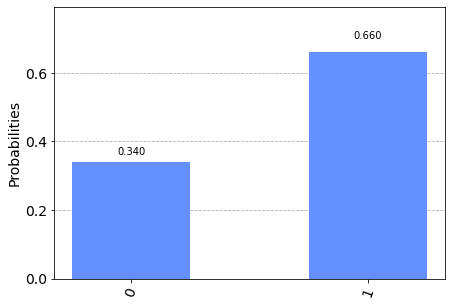

In [4]:
circuit.measure(quantum_register, classical_register)
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

## Tehtävä 1

a) Mihin kulmaan kubitin tilavektori on kierrettävä $R_y$-portilla, jos lopputilan |1> todennäköisyydeksi halutaan $\frac{3}{4}$?

b) Simuloi a-kohdan piirin toiminta ja piirrä todennäköisyysjakauma pylväsdiagrammina. Voit käyttää yllä olevaa mallikoodia apunasi. Muuta kierron arvoa.

In [8]:
# Tehtävä 1, ohjelmoi tähän

# Luodaan kvanttipiiri muuttujaan circ, jossa on yksi kubitti (diagrammissa q).
quantum_register = QuantumRegister(1)
classical_register = ClassicalRegister(1)
circuit2 = QuantumCircuit(quantum_register, classical_register)  # kubitin alkutila on |0>

circuit2.ry(2 * math.asin(math.sqrt(3/4)), 0)

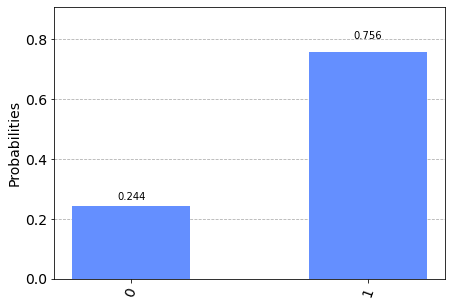

In [10]:
circuit2.measure(quantum_register, classical_register)
simulator = Aer.get_backend('qasm_simulator')
execute(circuit2, backend=simulator)
result = execute(circuit2, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit2))

## Kertausta kierrokselta 2: Lomittuminen (entanglement) ja CNOT-portti

Tehtävät 1 - 3 käsittelivät yhden kubitin systeemiä. Seuraavassa kahdessa tehtävässä tarkastelemme controlled NOT -porttia ($\mathit{CNOT}$), joka on kahden kubitin välinen operaatio. Kahden kubitin kvanttipiirissä systeemin tila esitetään seuraavilla kantavektoreilla:

$$
\ket{00},\ \ket{01},\ \ket{10},\ \ket{11}, 
$$

missä 

$$
\ket{00}=\pmatrix{1 \\ 0 \\ 0 \\0},\ \ket{01}=\pmatrix{0 \\ 1 \\ 0 \\0},\ 
\ket{10}=\pmatrix{0 \\ 0 \\ 1 \\0},\ \ket{11}=\pmatrix{0 \\ 0 \\ 0 \\1}.
$$

$\mathit{CNOT}$-portin operoidessa ensimmäinen qubitti on ns. ohjaava kubitti (control qubi1t), ja jälkimmäinen on kohdekubitti (target qubit). $\mathit{CNOT}$ vaikuttaa koko systeemin tilaan seuraavasti:

$$
\ket{00} \rightarrow  \ket{00}   \\
\ket{01} \rightarrow  \ket{01}   \\
\ket{10} \rightarrow  \ket{11}   \\
\ket{11} \rightarrow  \ket{10}   \\
$$

Tulos tarkoittaa, että jos ensimmäinen, ns. ohjaava kubitti on $0$, niin kohdekubitin tila ei muutu. Jos ohjaavakubitti $1$, niin kohdekubitin tila muuttuu. 

$\mathit{CNOT}$-portin matriisiesitys on seuraava:

$$
\mathit{CNOT} = \pmatrix {1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} 
$$

Huomaa, että vaikka matriisia merkitään monella kirjaimella, se ei ole monen matriisin tulo.

Piirrosmerkki, jossa ylempänä esitetty kubitti on ohjaava, ja alempi toimii kohteena:

![cnot](https://ollpu.fi/kvanttilaskenta-static/cnot.png)



## Conditional-phase gate eli ehdollinen cz-vaiheporttti kahden kubitin systeemissä

Toiminta: cz-portti flippaa kohdekubitin (target) vain jos ohjaavakubitti (control) on tilassa $\ket 1$. CZ-portti on symmetrinen, eli kumpitahansa qubiteista voi toimia kontrollikubittina. Vaiheen voi ajatella kubitin tilavektorin asentona Blochin pallolla.


$\mathit{CZ}$-portin matriisiesitys on seuraava:

$$
\mathit{CZ} = \pmatrix {1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0\\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1} 
$$


Piirrosmerkki,josta näkyy symmetrisyys.

![cz-piirrosmerkki](images/cz-piirrosmerkki.png)

Alla on toteuttettu CZ-portti käyttmällä H-porttia ja CNOT-porttia. Ohjelma tulostaa piirin sekä CZ-portin matriisiesityksen.

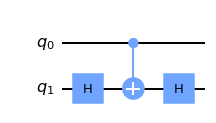

<IPython.core.display.Latex object>

In [16]:
# Johdanto tehtävään 2

from qiskit import *
from qiskit.visualization import *
backend = Aer.get_backend('unitary_simulator')

qc = QuantumCircuit(2)

qc.h(1)
qc.cx(0, 1)
qc.h(1)

matriisi = backend.run(qc).result().get_unitary(qc, decimals=3)
display(qc.draw(output='mpl'), array_to_latex(matriisi))

## Tehtävä 2

Ohjelmoi yllä olevan esimerkin avulla kuvassa esitetty kvanttipiiri ja sen matriisiesitys.

![cz.PNG](images/cz.PNG)

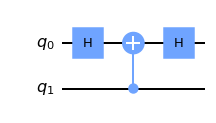

<IPython.core.display.Latex object>

In [17]:
# Kirjoita ohjelma tähän

from qiskit import *
from qiskit.visualization import *
backend = Aer.get_backend('unitary_simulator')

qc = QuantumCircuit(2)
# tee tähän lisäys

qc.h(0)
qc.cx(1, 0)
qc.h(0)

matriisi = backend.run(qc).result().get_unitary(qc, decimals=3)
display(qc.draw(output='mpl'), array_to_latex(matriisi))

In [ ]:
zero = matrix([1, 0]).H
one = matrix([0, 1]).H

plus = 1/sqrt(2)*matrix([1, 1]).H
minus = 1/sqrt(2)*matrix([1, -1]).H

tila = kron(one, one)
display(array_to_latex(tila))
display(array_to_latex(U*tila))

display(array_to_latex(kron(one, zero)))

## Tehtävä 3
Tehtävässä kaksi tutustutaan yleiseen kvanttipiirin avulla toteutettuun kvanttitilan teleportaatioon.

### Quantum teleportation eli kvanttiteleportaatio ja kubittien lomittuminen
Kvanttiteleportaation avulla voidaan siirtää kubitin tila fyysisesti kauas tietyillä esivalmisteluilla. Kvanttiteleportaatio perustuu kubittien lomittumiseen, eli kubittien väliseen kytkentään kvanttisysteemissä.

![teleportation](images/teleportation.png)

Kuvan kvanttipiirissä siirretään kubitin 0 tila kubitiin 2, paikasta A paikkaan B. Alla aiheesta tutoriaalivideo.

Ensin luodaan kubitin 1 ja 2 välille ns. Bellin pari eli lomitus Hadamard- ja CNOT-porttien avulla. Tämä pari luodaan esimerkiksi paikassa A, jonka jälkeen kubitti 2 siiretään fysisesti paikkaan B. 

Kun kubitin 0 tila halutaan siirtää kubitiin 2, niin paikassa A suoritetaan sarja operaatiota kubiteille 0 ja 1.  

Kubittien 0 ja 1 tilat mitatataan ja klassiset mittaustulokset lähetetään paikkaan B.

Mittaustuloksista riippuen paikassa B tehdään eri sarja operaatioita kubitille 2. Lopputuloksena kubitin 2 tila on sama kuin kubitin 0 alkuperäinen tila.


a) Katso tutoriaalivideo ja rakenna 3:n kubitin systeemi. Simuloi piirin toiminta.

Tutoriaalivideo:
<a href="https://youtu.be/mMwovHK2NrE" target="_blank">Kvanttiteleportaation qiskit-tutoriaali</a>

Videossa lähetetään ensin tila $\ket 1$ kubitista 0 kubittiin 2. Tämä tila saadaan aikaan yhdellä X-portilla alussa.

Lopun mittaustuloksissa nähdään ainoastaan tiloja, joissa kubitti 2 (binäärimerkkijonon ensimmäinen merkki) on 1, eli tila näyttäisi siirtyneen oikein. Muut kaksi bittiä ovat sattumanvaraisia.

b) Luo piiri uudestaan erilaisella alkutilalla, ja tutki tuloksia.
Jos muokkaat alkuperäistä koodia, aja jokainen solu uudestaan järjestyksessä, jotta saat uuden piirin.

Kirjaa saamasi tulokset muistiin esimerkiksi alle.

**OHJE:**
Jos sinulla on vaikeuksia koodata tutoriaalivideon avulla, niin voit käyttää apuna alla olevissa koodisolouissa olevaa valmista koodia.

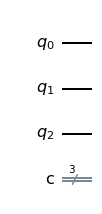

In [26]:
from qiskit import *
# QUBIT ORDERING
# q0 = State |psi> that we want to teleport
# q1 = Alice's half of the Bell pair
# q2 = Bob's half of the Bell pair, the destination of the teleportation

circuit = QuantumCircuit(3,3)
%matplotlib inline
circuit.draw(output='mpl')

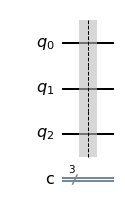

In [27]:
# Step 0: Create the state to be teleported in qubit 0
#circuit.x(0) # qubit 0 is now in state |1>, and this is the state that we want to teleport
circuit.barrier()
circuit.draw(output='mpl')

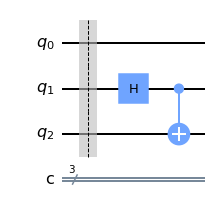

In [28]:
# Step 1: create an entangled Bell pair between Alice and Bob (qubits 1 and 2)
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output='mpl')

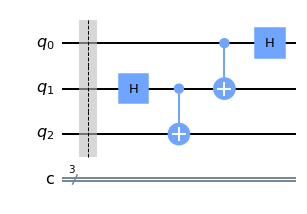

In [29]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

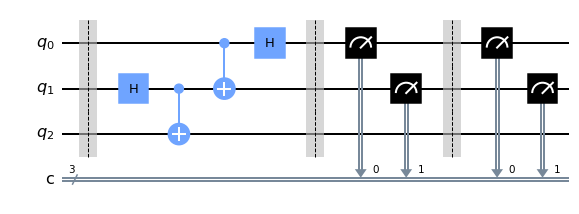

In [31]:
# Step 3: Alice measures both qubits 0 and 1
circuit.barrier()
circuit.measure([0, 1], [0, 1]) # results stored in classical bits 0 and 1
circuit.draw(output='mpl')

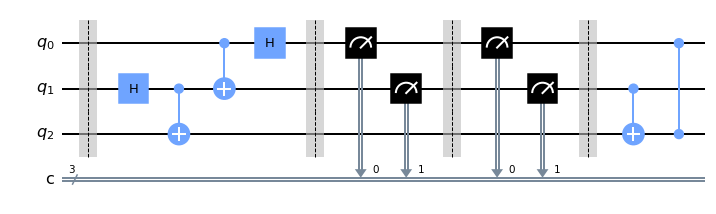

In [32]:
circuit.barrier()
# Step 4: Now that Alice has measured the two qubits, their states have collapsed to 0 and 1. 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
# Note that while we're conditioning Bob's operation on the collapsed qubits 0 and 1, we can
# do teleportation over long distances by transmitting the classical information in classical bits 0 and 1
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

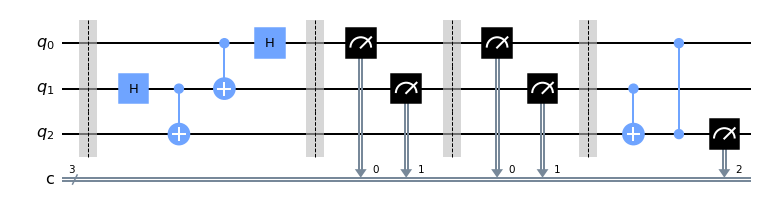

In [33]:
# Step 5: Done! Measure Bob's qubit to find out what state it is in
circuit.measure([2], [2])
circuit.draw(output='mpl')

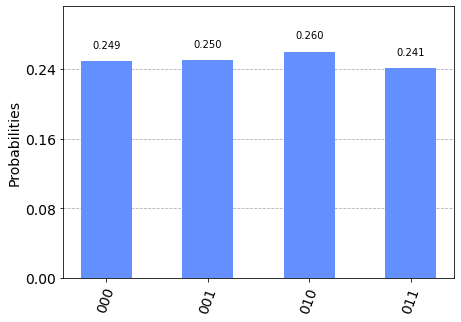

In [34]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.visualization import plot_histogram
counts = result.get_counts(circuit)
plot_histogram(counts)

Tulosten tulkinta: Pylväsdiagrammin binäärilukujen "alin bitti" on rekisteriin 2 tallennettu kubitin 2 tila. Eli kubitin kaksi tila on aina 1 niin kuin oli kubitissa , jonka tilaa haluttiin siirtää.

## Tehtävä 4: Arvo lottonumerot kvanttitietokoneella

Kvanttitietokoneiden muistissa informaatio on esitetty klassisten bittien sijasta kubittien avulla. Yhden kubitin tila voi olla samanaikaisesti molempien tilojen 0 ja 1 yhdistelmä eli superpositio.

$$ \mid\psi> = a\mid0>+b\mid1> $$

Kubitin tilaa havainnollistetaan usein ns. Blochin pallon pinnalle päättyvänä vektorina.  Kun kubittiin operoidaan esimerkiksi kvanttiportilla H, niin päädytään tilanteeseen, jossa yhden kubitin tila on samanaikaisesti olla tilojen 0 ja 1 yhdistelmä:

$$ \mid\psi> = \frac{1}{\sqrt{2}}\mid0>+\frac{1}{\sqrt{2}}\mid1> $$

Alla olevassa koodiesimerkissä käytetään IBM:N qiskit python-kirjaston funktioita ja luodaan 7 kubitin kvanttipiiri.  Kun yksittäistä kubittia operoidaan H-portilla, kubitti siirtyy tilojen 0 ja 1 yhdistelmätilaan. Jos superpositiotila mitataan, on yhtä suuri todennäköisyys mitata bitin arvoksi 0 tai 1. Huomaa, että tilavektorin kärki on tällöin yhtä kaukana pallon molemmista navoista.

In [35]:
from qiskit import *
from qiskit.tools.monitor import job_monitor

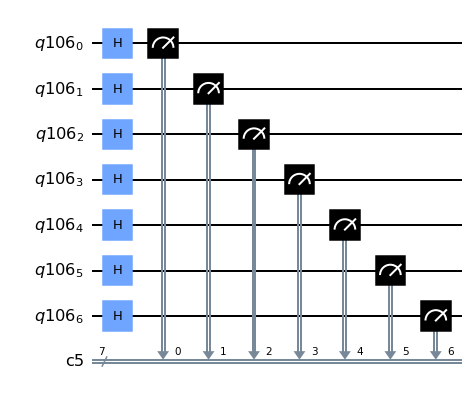

In [36]:
num_bits = 7
num_numbers = 7
qr = QuantumRegister(num_bits)
cr = ClassicalRegister(num_bits)
circuit = QuantumCircuit(qr, cr)

for i in range(num_bits):
    circuit.h(i)

circuit.measure(qr, cr)

circuit.draw(output="mpl")

Yllä olevassa kuvassa kubiteilla $0 -6$ on jokaisella 50%:n todennäköisyys asettua mittauksessa lopputilaan $0$ tai $1$. Kun kvanttialgoritmisuoritetaan saadaan tulokseksi satunnainen binääriluku, jossa on $7$ bittiä. Algoritmi simuloidaan tietokoneella hyvin montakertaa ja mittaustuloksina saadut erilaiset 7:n bitin yhdistelmät ja niiden esiintymisfrekvenssit tallennetaan python sanakirjaan. Lottonumeroksi valitaan se binääriluku, jolla on suurin esiintymisfrekvenssi. Jos numero on jo valittu tai numero suurempi kuin 40, niin arvonta suoritetaan uudelleen.

In [ ]:
# Voit selvittää mitä palveluita on käytössä
#from qiskit import IBMQ, Aer # tämä import suoritettiin jo yllä
'''
provider = IBMQ.load_account()
available_cloud_backends = provider.backends() 
print('\nKäytettävissäsi olevat palvelut verkossa: ')
for i in available_cloud_backends: print(i)

available_local_backends = Aer.backends() 
print('\n Paikalliset koneellesi käytössä olevat palvelut: ')
for i in available_local_backends: print(i)
'''

In [37]:
# vaihtoehto 1: Simuloidaan piirin toiminta paikallisesti omalla tietokoneella
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator)


In [38]:
job_monitor(result)
print(result.result().get_counts())

Job Status: job has successfully run
{'1100110': 5, '1011010': 8, '0111110': 3, '1110001': 9, '1101010': 7, '1001101': 6, '1001111': 5, '0011110': 9, '1110111': 7, '1111011': 9, '0100110': 6, '0110110': 7, '1100010': 8, '1101100': 8, '1000100': 10, '0100100': 7, '0101100': 5, '1111110': 10, '0100011': 11, '0100111': 10, '0010000': 7, '1000010': 4, '0111101': 8, '0001100': 5, '0001110': 8, '1000000': 7, '0011010': 8, '1101110': 10, '0111010': 7, '1101001': 5, '0110000': 7, '1001010': 8, '0000110': 7, '0001010': 9, '1000111': 15, '1001000': 8, '0111001': 6, '0010101': 8, '1100000': 7, '0111000': 7, '0000010': 7, '0101011': 7, '1111010': 6, '1101011': 7, '0101000': 6, '1100101': 11, '1011100': 9, '0011111': 10, '0101101': 8, '0110111': 6, '0000000': 11, '0110011': 14, '1111111': 9, '1111100': 7, '1010000': 9, '0111100': 12, '0001000': 12, '0111111': 8, '1010111': 10, '0001101': 10, '1100100': 8, '1101000': 7, '1100111': 6, '1011011': 16, '0000001': 15, '0110010': 12, '1100001': 7, '010000

In [41]:
print(0b1111111)

127


In [43]:
def lotto(circuit, simulator):
    
    r = execute(circuit, backend=simulator).result()
    numerot = {}
    
    max_value = 0
    max_key = 0
    isMaxUnique = True
    
    for key, value in r.get_counts().items():
        if value > max_value:
            max_value = value
            max_key = key
            isMaxUnique = True
        elif value == max_value:
            isMaxUnique = False
    
    # Jos saadaan tulokseksi 0 tai yli 40, heitetään uudelleen.
    # Myös jos on kaksi yhtä todennäköistä vastausta, joudutaan heittämään uudelleen
    
    if not isMaxUnique or int(max_key,2)  == 0 or int(max_key,2) > 40:
        return lotto(circuit, simulator)
    
    return int(max_key, 2)

In [44]:
# testataan, arvotaan yksi lottopallo väliltä 1 - 40
print(lotto(circuit, simulator))

8


In [45]:
# Arvotaan 7 oikein numerot
numbers = []
while len(numbers) < num_numbers:
    number = lotto(circuit, simulator)
    if number not in numbers:
        numbers.append(number)
        print(numbers)
        
numbers.sort()
print("arvotut numerot ovat: ", numbers)

[26]
[26, 2]
[26, 2, 3]
[26, 2, 3, 35]
[26, 2, 3, 35, 18]
[26, 2, 3, 35, 18, 14]
[26, 2, 3, 35, 18, 14, 21]
arvotut numerot ovat:  [2, 3, 14, 18, 21, 26, 35]
